## Step 0 : upload kaggle.json [here](https://www.kaggle.com/shanleetaiwan/account), get fruits-360 dataset

In [ ]:
import os
os.environ['KAGGLEUSERNAME'] = "shanleetaiwan"
os.environ['KAGGLEKEY'] = "6918c959f7bb5be468db8d65a04bb197"

In [ ]:
!cd /root
# ! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#download kaggle data
!kaggle datasets download -d moltean/fruits
!unzip fruits.zip

串流輸出內容已截斷至最後 5000 行。
  inflating: fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360/Training/Tomato 3/128_100.jpg  
  inflating: fruits-360/Training/Tomato 3/129_100.jpg  
  inflating: fruits-360/Tra

## Step 1: Load data(using professor's method)

In [ ]:
# import numpy as np
# import os
# import glob
# import cv2
# import time
# import tensorflow as tf
# fruit_dir="fruits-360"

# def convert_to_hsv_and_grayscale(x):
#     hsv = tf.image.rgb_to_hsv(x)
#     gray = tf.image.rgb_to_grayscale(x)
#     rez = tf.concat([hsv, gray], axis=-1)
#     return rez

# def augment_image(x):
#     x = tf.image.random_saturation(x, 0.9, 1.2)
#     x = tf.image.random_hue(x, 0.02)
#     return x

# class_id = {}
# class_name={}
# training_set_size = 0
# test_set_size = 0
# for idx,x in enumerate(glob.iglob(os.path.join(fruit_dir,os.path.join('Training','*')))):
#     training_set_size+= len(glob.glob(os.path.join(x,'*.jpg')))
#     class_id[x.split('/')[-1]] = idx
#     class_name[idx] = x.split("/")[-1]

# for idx,x in enumerate(glob.iglob(os.path.join(fruit_dir,os.path.join('Test','*')))):
#     test_set_size+= len(glob.glob(os.path.join(x,'*.jpg')))

# print('total number of training images: {}, total number of test images: {}, total number of classes: {}'.format(training_set_size,test_set_size,len(class_id)))

# x_train = np.zeros((training_set_size,100,100,3),dtype=np.float32)
# training_label = np.zeros((training_set_size,),dtype=np.int)
# x_test = np.zeros((test_set_size,100,100,3),dtype=np.float32)
# test_label = np.zeros((test_set_size,),dtype=np.int)


# training_id = 0
# for x in glob.iglob(os.path.join(fruit_dir,os.path.join('Training','*'))):
#     cid = class_id[x.split("/")[-1]]
#     for f in glob.glob(os.path.join(x,'*.jpg')):
#         img = cv2.imread(f,cv2.IMREAD_COLOR)[:,:,[2,1,0]]
#         x_train[training_id,:,:,:]  = img 
#         training_label[training_id] = cid
#         training_id = training_id + 1

# test_id = 0
# cid = 0        
# for x in glob.iglob(os.path.join(fruit_dir,os.path.join('Test','*'))):
#     cid = class_id[x.split("/")[-1]]
#     for f in glob.glob(os.path.join(x,'*.jpg')):
#         img = cv2.imread(f,cv2.IMREAD_COLOR)[:,:,[2,1,0]]
#         x_test[test_id,:,:,:] = img
#         test_label[test_id] = cid
#         test_id = test_id + 1
        

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.figure(figsize=(20,8))
# for splt,idx in enumerate(np.random.permutation(x_train.shape[0])[:5]):
#     plt.subplot(2,5,splt+1)
#     img = x_train[idx].astype(np.uint8)
#     plt.imshow(img)
#     plt.title('training:{},id#:{}'.format(class_name[training_label[idx]],idx))
#     plt.axis('Off')

# for splt,idx in enumerate(np.random.permutation(x_test.shape[0])[:5]):
#     plt.subplot(2,5,splt+6)
#     img = x_train[idx].astype(np.uint8)
#     plt.imshow(img)
#     plt.title('test:{},id#:{}'.format(class_name[test_label[idx]],idx))
#     plt.axis('Off')
# plt.show() 

## Step 1: Load Data (using ImageDataGenerator)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
import numpy as np

datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_generator = datagen.flow_from_directory('fruits-360/Training', target_size = (100,100), batch_size = 32, subset='training')
test_generator = datagen.flow_from_directory('fruits-360/Test', target_size = (100,100), batch_size = 32)
val_generator = datagen.flow_from_directory('fruits-360/Training', target_size = (100,100), batch_size = 32, subset='validation')

Found 60955 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.
Found 6737 images belonging to 131 classes.


## Step 2: Prepare Training/Test/Validation set 

In [ ]:
X_train, y_train = train_generator.next()
print(X_train.shape)
print(y_train.shape)
X_test, y_test = test_generator.next()
print(X_test.shape)
print(y_test.shape)

(32, 100, 100, 3)
(32, 131)
(32, 100, 100, 3)
(32, 131)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=30)

### using one-hot encoding to catogorize label

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train) #train
y_val = to_categorical(y_val)  #validation
y_test = to_categorical(y_test) #test


## Step 3 : Define Model

In [ ]:
def convert_to_hsv_and_grayscale(x):
    import tensorflow as tf
    hsv = tf.image.rgb_to_hsv(x)
    gray = tf.image.rgb_to_grayscale(x)
    rez = tf.concat([hsv, gray], axis=-1)
    return rez

### define 5*5 convolutional layer model

In [ ]:
import cv2
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, Input, Lambda
from keras.optimizers import Adam
import tensorflow as tf

def define_network_architecture_5x5():
    img_input = Input(shape=(100,100,3), name='data')
    x = Lambda(convert_to_hsv_and_grayscale)(img_input)

    x = Conv2D(16,(5,5), strides=(1,1), padding='same', name='conv1')(x)
    x = Activation('relu', name='conv1_relu')(x)
    x = MaxPooling2D((2,2), strides=(2,2), padding='valid', name='pool1')(x)

    x = Conv2D(32,(5,5), strides=(1,1), padding='same', name='conv2')(x)
    x = Activation('relu', name='conv2_relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), padding='valid', name='pool2')(x)

    x = Conv2D(64, (5, 5), strides=(1, 1), padding='same', name='conv3')(x)
    x = Activation('relu', name='conv3_relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), padding='valid', name='pool3')(x)
                                                                            
    x = Conv2D(128, (5, 5), strides=(1, 1), padding='same', name='conv4')(x)
    x = Activation('relu', name='conv4_relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), padding='valid', name='pool4')(x)
    
    x = Flatten()(x)
    x = Dense(1024, activation='relu', name='fcl1')(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu', name='fcl2')(x)
    x = Dropout(0.2)(x)
    out = Dense(131, activation='softmax', name='predictions')(x)
    model = Model(inputs=img_input, outputs=out)

    model.summary()
    print('the total number of layers:{}'.format(len(model.layers)))    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
model_5x5 = define_network_architecture_5x5()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            [(None, 100, 100, 3)]     0         
_________________________________________________________________
lambda (Lambda)              (None, 100, 100, 4)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 100, 100, 16)      1616      
_________________________________________________________________
conv1_relu (Activation)      (None, 100, 100, 16)      0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 50, 50, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 50, 50, 32)        12832     
_________________________________________________________________
conv2_relu (Activation)      (None, 50, 50, 32)       

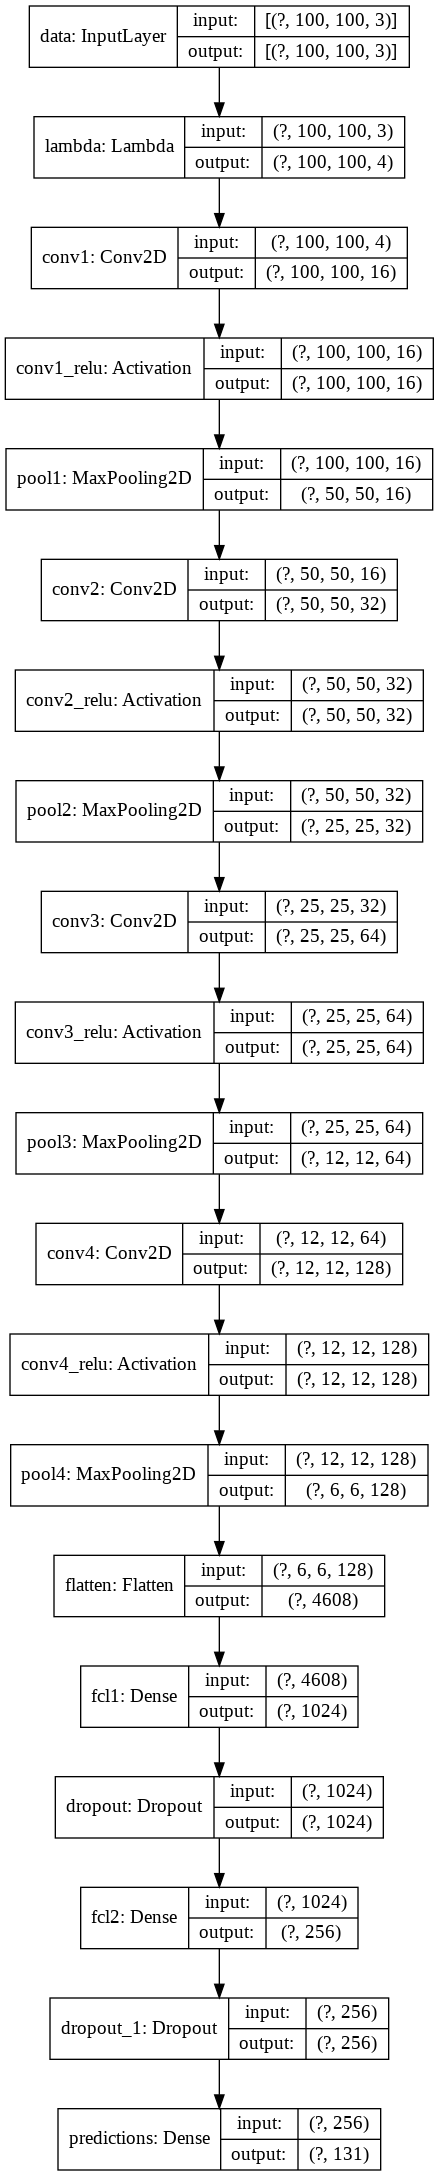

In [ ]:
from keras.utils import plot_model
plot_model(model_5x5,show_shapes=True,show_layer_names=True)

In [ ]:
train_generator.reset()
test_generator.reset()

In [ ]:
import time
s = time.time()
batch_size=32
epochs=10
history_5x5 = model_5x5.fit_generator(train_generator,validation_data=val_generator, epochs=10, steps_per_epoch=train_generator.samples//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1904/1904 [==============================] - 48s 25ms/step - loss: 0.7828 - accuracy: 0.7901 - val_loss: 0.3297 - val_accuracy: 0.9345
Epoch 2/10
1904/1904 [==============================] - 46s 24ms/step - loss: 0.0856 - accuracy: 0.9744 - val_loss: 0.2738 - val_accuracy: 0.9534
Epoch 3/10
1904/1904 [==============================] - 46s 24ms/step - loss: 0.0732 - accuracy: 0.9800 - val_loss: 0.2175 - val_accuracy: 0.9580
Epoch 4/10
1904/1904 [==============================] - 46s 24ms/step - loss: 0.0545 - accuracy: 0.9855 - val_loss: 0.3297 - val_accuracy: 0.9351
Epoch 5/10
1904/1904 [==============================] - 46s 24ms/step - loss: 0.0531 - accuracy: 0.9869 - val_loss: 0.3840 - val_accuracy: 0.9316
Epoch 6/10
1904/1904 [==============================] - 46s 24ms/step - loss: 0.0505 - accuracy: 0.9877 - val_loss: 0.1602 - val_accuracy: 0.9687
Epoch 7/10
1904/1904 [==========================

In [ ]:
print('training time:{}'.format(time.time()-s))

training time:475.18081545829773


In [ ]:
print(X_val.shape[0])

4


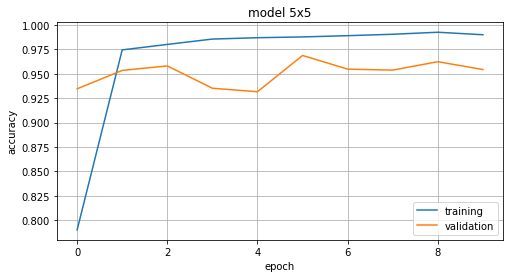

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.title('model 5x5')
plt.plot(history_5x5.history['accuracy'],label='training')
plt.plot(history_5x5.history['val_accuracy'],label='validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid('On')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, Input, Concatenate, Lambda
from tensorflow.keras.optimizers import Adam
def define_network_architecture_3x3():
    data = Input(shape=(100,100,3), name='data')
    x0   = Lambda(convert_to_hsv_and_grayscale)(data)
    x1   = Conv2D(8,(3,3),strides=(1,1),padding='same',activation='relu')(x0)
    x2   = Conv2D(8,(3,3),strides=(1,1),padding='same',activation='relu')(x1)
    z    = Concatenate()([x1,x2])
    z    = MaxPooling2D(pool_size=(2,2))(z)
#   改作者設計加入若干層 Conv2D Conv2D Concatenate MaxPooling2D
    x3   = Conv2D(8,(3,3),strides=(1,1),padding='same',activation='relu')(z)
    x4   = Conv2D(8,(3,3),strides=(1,1),padding='same',activation='relu')(x3)
    z    = Concatenate()([x3,x4])
    z    = MaxPooling2D(pool_size=(2,2))(z)
    x5   = Conv2D(8,(3,3),strides=(1,1),padding='same',activation='relu')(z)
    x6   = Conv2D(8,(3,3),strides=(1,1),padding='same',activation='relu')(x5)
    z    = Concatenate()([x5,x6])
    z    = MaxPooling2D(pool_size=(2,2))(z)
#    
    z    = Flatten()(z)
    z    = Dense(1024,activation='relu')(z)
    z    = Dropout(0.2)(z)
    z    = Dense(256,activation='relu')(z)
    z    = Dropout(0.2)(z)
    z    = Dense(131,activation='softmax')(z)
    model = Model(inputs=data,outputs=z)
    model.summary()
    print('the total number of layers:{}'.format(len(model.layers)))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
model_3x3 = define_network_architecture_3x3()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 100, 100, 4)  0           data[0][0]                       
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 100, 8)  296         lambda_1[0][0]                   
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 100, 100, 8)  584         conv2d[0][0]                     
_______________________________________________________________________________________

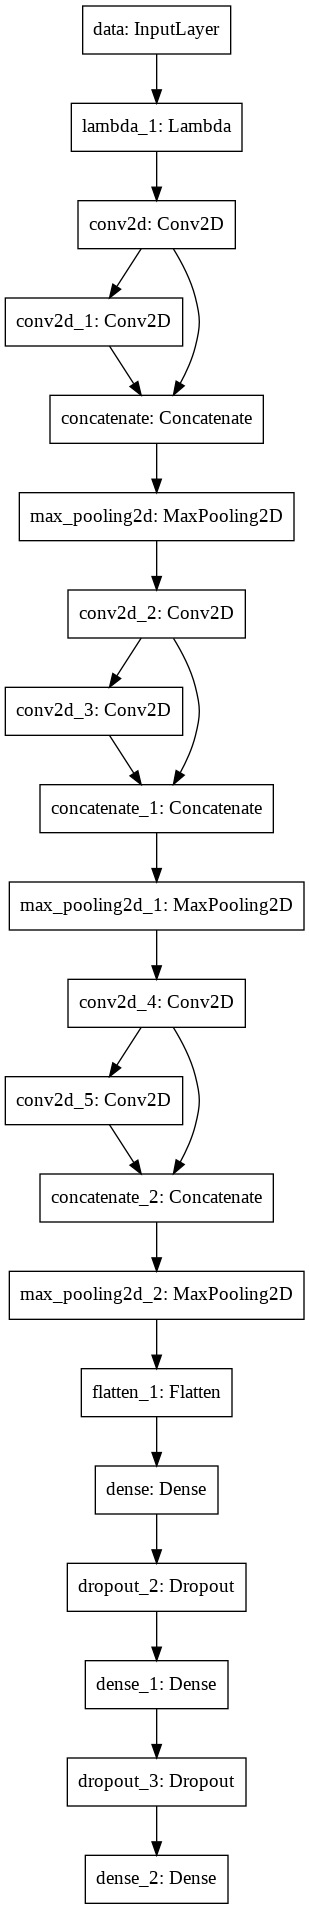

In [ ]:
from keras.utils import plot_model
plot_model(model_3x3)

In [ ]:
batch_size=32
epochs=10
history_3x3 = model_3x3.fit_generator(train_generator, epochs=10,validation_data=val_generator, steps_per_epoch=train_generator.samples//batch_size)

Epoch 1/10
1904/1904 [==============================] - 48s 25ms/step - loss: 0.6469 - accuracy: 0.8259 - val_loss: 0.3815 - val_accuracy: 0.9115
Epoch 2/10
1904/1904 [==============================] - 47s 25ms/step - loss: 0.0777 - accuracy: 0.9754 - val_loss: 0.2195 - val_accuracy: 0.9506
Epoch 3/10
1904/1904 [==============================] - 46s 24ms/step - loss: 0.0562 - accuracy: 0.9831 - val_loss: 0.1794 - val_accuracy: 0.9526
Epoch 4/10
1904/1904 [==============================] - 46s 24ms/step - loss: 0.0436 - accuracy: 0.9874 - val_loss: 0.2072 - val_accuracy: 0.9619
Epoch 5/10
1904/1904 [==============================] - 44s 23ms/step - loss: 0.0369 - accuracy: 0.9901 - val_loss: 0.1457 - val_accuracy: 0.9727
Epoch 6/10
1904/1904 [==============================] - 43s 23ms/step - loss: 0.0343 - accuracy: 0.9908 - val_loss: 0.2113 - val_accuracy: 0.9642
Epoch 7/10
1904/1904 [==============================] - 43s 22ms/step - loss: 0.0336 - accuracy: 0.9908 - val_loss: 0.2059 -